# Import library

In [33]:
# numerical operation
from math import exp
import numpy as np

# plot
from pylab import figure, cm
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# 1

In [34]:
# define function
def f(x):
  return (x ** 3) * exp(-(x ** 2))

# define interval
interval = [-2, 2]

In [35]:
# plot
def plot(title, history):
    plt.figure(figsize=(10,5))
    plt.plot(history, label = "1")
    plt.title(title)
    plt.xlabel("Iteration number")
    plt.ylabel("Function value")
    plt.show()

## Golden section method

In [36]:
def golden_section(a, b, ep):
  alpha = (5 ** (1/2) - 1) / 2
  x1 = a
  x2 = b
  x_sol = x1
  history = []

  while True:
    # set variable
    new_sol = 0
    u1 = x1 + (x2 - x1) * (1 - alpha)
    u2 = x1 + (x2 - x1) * alpha

    # update
    if f(u1) > f(u2):
      x1 = u1
      new_sol = x1
    else:
      x2 = u2
      new_sol = x2

    # terminal condition
    if abs(f(new_sol) - f(x_sol)) / abs(f(new_sol)) < ep:
      history.append(f(new_sol))
      return history
    else:
      history.append(f(x_sol))
      x_sol = new_sol

In [37]:
history = golden_section(-2, 2, 10 ** (-7))

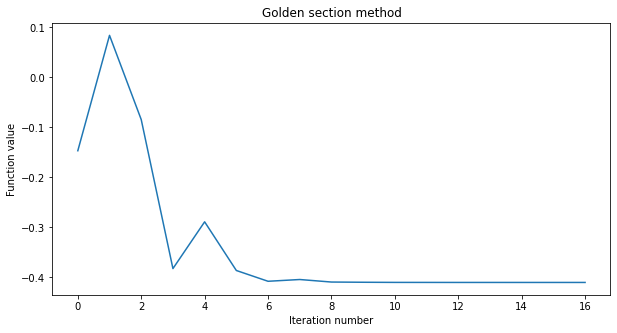

In [38]:
plot("Golden section method", history)

## Dichotomous search method

In [39]:
def Dichotomous(a, b, delta, ep):
  alpha = (5 ** (1/2) - 1) / 2
  x1 = a
  x2 = b
  x_sol = x1
  history = []

  while True:
    # set variable
    new_sol = 0
    u1 = (x1 + x2) / 2 - delta
    u2 = (x1 + x2) / 2 + delta

    # update
    if f(u1) > f(u2):
      x1 = u1
      new_sol = x1
    else:
      x2 = u2
      new_sol = x2

    # terminal condition
    if abs(f(new_sol) - f(x_sol)) / abs(f(new_sol)) < ep:
      history.append(f(new_sol))
      return history
    else:
      history.append(f(x_sol))
      x_sol = new_sol

In [40]:
history = Dichotomous(-2, 2, 0.0000001, 10 ** (-5))

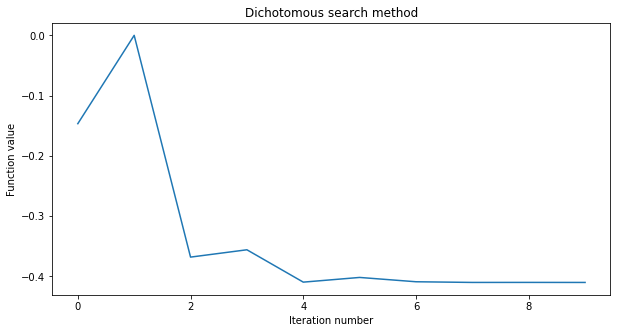

In [41]:
plot("Dichotomous search method", history)

## quadratic interpolation method(bug not fix)

In [42]:
# define function
def quadratic(a, b, c, ep):
  x1 = a
  x2 = b
  x3 = c
  x_sol = x2

  while True:
    # set new solution
    # q1(x) = f(x1)(x - x2)(x - x3) / (x1 - x2)(x1 - x3)
    d1 = f(x1) / ((x1 - x2) * (x1 - x3))
    c1 = d1 * (x2 + x3)
    # q2(x) = f(x2)(x - x3)(x - x1) / (x2 - x3)(x2 - x1)
    d2 = f(x2) / ((x2 - x3) * (x2 - x1))
    c2 = d2 * (x3 + x1)
    # q3(x) = f(x3)(x - x1)(x - x2) / (x3 - x1)(x3 - x2)
    d3 = f(x3) / ((x3 - x1) * (x3 - x2))
    c3 = d3 * (x1 + x2)
    # q = q1 + q2 + q3
    a1 = d1 + d2 + d3
    a2 = c1 + c2 + c3
    # print("d1: " + str(d1) + " d2: " + str(d2) + " d3: " + str(d3))
    if a1 == 0:
      new_sol = x2
    else:
      new_sol = -a2 / (2 * a1)

    # debug
    if new_sol < x1 or new_sol > x3:
      new_sol = x2

    # update
    if new_sol < x2 or new_sol == x2:
      if f(new_sol) < f(x2) or f(new_sol) == f(x2):
        x3 = x2
        x2 = new_sol
      else:
        x1 = new_sol
    else:
      if f(new_sol) < f(x2) or f(new_sol) == f(x2):
        x1 = x2
        x2 = new_sol
      else:
        x3 = new_sol

    # adjust mid
    if x2 == x1 or x2 == x3:
      x2 = (x1 + x3) / 2
      new_sol = x2

    # terminal condition
    if abs(f(new_sol)) > 0 and abs(f(new_sol) - f(x_sol)) / abs(f(new_sol)) < ep:
      return new_sol
    else:
      # print(x_sol)
      x_sol = new_sol

In [43]:
x = quadratic(-2, 0, 2, 10 ** (-7))
print(f(x))

-0.14652512202684517


In [44]:
# plot

# 2

In [45]:
# define Himmelblau's function
def Himmelblau(x1, x2):
  return (x1 ** 2 + x2 - 11) ** 2 + (x1 + x2 ** 2 - 7) ** 2

# return Himmelblau's value given single direction and length
def direction_Hvalue(a, b, d, x):
  return Himmelblau(a + d[0] * x, b + d[1] * x)

# use golden section method to find the minimum value of Himmelblau's given single direction
def Hgolden_section(a, b, initx, inity, ep, d):
  alpha = (5 ** (1/2) - 1) / 2
  x1 = a
  x2 = b
  x_sol = x1
  count = 1

  while True:
    # set variable
    new_sol = 0
    u1 = x1 + (x2 - x1) * (1 - alpha)
    u2 = x1 + (x2 - x1) * alpha

    # update
    if direction_Hvalue(initx, inity, d, u1) > direction_Hvalue(initx, inity, d, u2):
      x1 = u1
      new_sol = x1
    else:
      x2 = u2
      new_sol = x2

    # terminal condition
    if abs(direction_Hvalue(initx, inity, d, new_sol) - direction_Hvalue(initx, inity, d, x_sol)) / abs(direction_Hvalue(initx, inity, d, new_sol)) < ep:
      history.append(direction_Hvalue(initx, inity, d, new_sol))
      return new_sol
    else:
      # print(x_sol)
      count += 1
      x_sol = new_sol

# calculate Euclidean distance
def distance(x1, y1, x2, y2):
  return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1 / 2)

# plot
def Himmelblau_plot(history):
  x1_min = -5.0
  x1_max = 5.0
  x2_min = -5.0
  x2_max = 5.0
  codes = [Path.MOVETO]

  for i in range(1, len(history)):
    codes.append(Path.LINETO)
  path = Path(history, codes)
  fig, ax = plt.subplots()
  patch = patches.PathPatch(path, facecolor='none', edgecolor='red', lw=2)
  ax.add_patch(patch)
  ax.set_xlim(-5, 5)
  ax.set_ylim(-5, 5)

  x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
  y = Himmelblau(x1, x2)
  plt.imshow(y,extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')
  plt.colorbar()
  plt.title("cyclic coordinate method", fontsize=8)
  plt.show()

# define interval
interval = [-5, 5]

## cyclic coordinate method

In [46]:
def cyclic_coordinate(x, y, ep1, ep2):
  direction = [[1, 0], [0, 1]]
  initx = x
  inity = y
  pre_initx = initx
  pre_inity = inity
  verts = [(initx, inity)]

  while True:
    # update each direction
    x = Hgolden_section(-5 - initx, 5 - initx, initx, inity, ep1, direction[0])
    initx = initx + x
    verts.append((initx, inity))
    x = Hgolden_section(-5 - inity, 5 - inity, initx, inity, ep1, direction[1])
    inity = inity + x
    verts.append((initx, inity))

    # terminal condition
    if distance(pre_initx, pre_inity, initx, inity) < ep2:
      return verts
    else:
      pre_initx = initx
      pre_inity = inity

In [47]:
# initial points: (0, -5), (-5, 5), (5, 2), (2, -2) can reach 4 local minimum, respectively
history = cyclic_coordinate(2, -2, 10 ** (-5), 10 ** (-7))

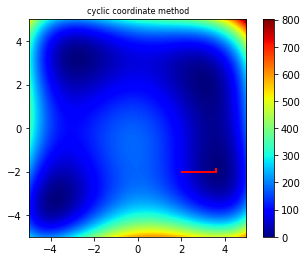

In [48]:
Himmelblau_plot(history)

# 3

## Nelder-Mead downhill simplex method

In [49]:
def Nelder_Mead(p1, p2, p3, ep):
  alpha = 1
  beta = 0.5
  gamma = 2
  min = p1
  mid = p1
  max = p1
  simplex = []

  # set min, mid, max
  if Hcompare(p1, p2):
    max = p1
    min = p2
  else:
    max = p2

  if Hcompare(min, p3):
    mid = min
    min = p3
  elif Hcompare(max, p3):
    mid = p3
  else:
    mid = max
    max = p3

  simplex.append(((min[0] + mid[0] + max[0]) / 3, (min[1] + mid[1] + max[1]) / 3))

  while True:
    # set averaged position
    pa = [(min[0] + mid[0]) / 2, (min[1] + mid[1]) / 2]
    # set reflection point
    pr = [pa[0] + alpha * (pa[0] - max[0]), pa[1] + alpha * (pa[1] - max[1])]

    # f(xmin) > f(xr)
    if Hcompare(min, pr):
      # set expansion point
      pe = [pa[0] + gamma * (pr[0] - pa[0]), pa[1] + gamma * (pr[1] - pa[1])]
      max = mid
      mid = min

      # If f(xr) > f(xe)
      if Hcompare(pr, pe):
        min = pe
      else:
        min = pr
    # If the second largest f(xi) ≥ f(xr)
    elif Hcompare(mid, pr):
      max = mid
      mid = pr
    else:
      # f(xp) = min{f(xr), f(xmax)}
      pp = pr
      if Hcompare(pr, max):
        pp = max

      # set contraction point
      pc = [pa[0] + beta * (pp[0] - pa[0]), pa[1] + beta * (pp[1] - pa[1])]

      # If f(xc) > f(xp)
      if Hcompare(pc, pp):
        # replace xj by xj + (xmin–xj)/2
        tmp1 = [pc[0] + (min[0] - pc[0]) / 2, pc[1] + (min[1] - pc[1]) / 2]
        tmp2 = [mid[0] + (min[0] - mid[0]) / 2, mid[1] + (min[1] - mid[1]) / 2]

        if Hcompare(tmp1, min):
          tmp1 = max
        else:
          max = min
          min = tmp1

        if Hcompare(min, tmp2):
          mid = min
          min = tmp2
        elif Hcompare(max, tmp2):
          mid = tmp2
        else:
          mid = max
          max = tmp2
      # xc replaces xmax
      else:
        if Hcompare(min, pc):
          max = mid
          mid = min
          min = pc
        elif Hcompare(mid, pc):
          max = mid
          mid = pc
        else:
          max = pc

    simplex.append(((min[0] + mid[0] + max[0]) / 3, (min[1] + mid[1] + max[1]) / 3))

    # terminal condition
    if distance(min[0], min[1], max[0], max[1]) < ep:
      return simplex


def Hcompare(a, b):
  if Himmelblau(a[0], a[1]) > Himmelblau(b[0], b[1]):
    return True
  else:
    return False

In [50]:
p1 = [0, -5]
p2 = [-5, 0]
p3 = [5, 5]

history = Nelder_Mead(p1, p2, p3, 10 ** (-3))

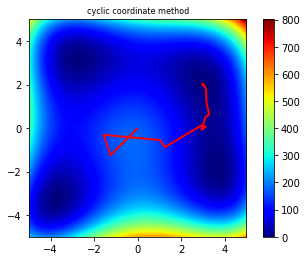

In [51]:
Himmelblau_plot(history)